# E-commerce transaction data analysis

Yuanzheng Zhu

## Problem overview

We have visitors and orders data, find business insight from data analysis, like potential growth opportunities.


In [13]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import  warnings
warnings.simplefilter('ignore')

# Load Data
We will take a look into data, a descriptive statistics summary will be provided

In [14]:
orders = pd.read_csv('./data/transactions_202001.csv')
orders.head()


,user_id,transaction_id,time,country,items,total,returned_items
0,cadeed9426d287cb9cb651cd7ed4f103,2fa41e338cf91fffba68c6f9fb80add6,1541185315,A,1,18.56,0
1,bb3936cb7bb0f605d187a52ff5e03438,795caad659fc9038034aaf5ecf873e61,1541185411,A,4,34.02,0
2,ae2178e497fc7a38917d950e52ff22ec,29fe89653bb7268b3a7ade23387ba326,1541185455,A,15,346.39,0
3,3421071b1e44d7160cac7dc6accb4f50,a6e04c84c1dd826a6036e26ea513951d,1541185510,C,1,18.56,0
4,82798f7788ad20ce34118c925055c06b,7c849f99090de7ec2322d6d31472a607,1541185706,A,1,58.76,0


In [15]:
#orders.info()
#orders.describe()

In [16]:
visitors = pd.read_csv('./data/visitors_202001.csv')
visitors.head()

,user_id,client,ip_country,gender,year_born,channel,time,minutes,session_id
0,de4c93c3293c76f3aa95c4c57be7e09f,androidapp,A,F,1948,paid,1525762800,4,cfd3f6f2eda4c859d19f5cef56f26351
1,0e399e7047198e3a9fc8c2baed521d60,web,B,M,1985,organic,1525762800,35,54b4133384ab0bfa97675240fa939007
2,2fbb988aa25afb749bfe86bb314a79cb,iosapp,A,F,1999,organic,1525762800,4,b609d8ffaaf5e80075836dcf32580b04
3,763019e3db7510769a85cec170abf53d,androidapp,C,F,1985,organic,1525762800,5,49759218c2c231d4d41592facd2811d0
4,b6835da7d9d3595b6e12c100fca1d51c,iosapp,A,F,1960,organic,1525762800,5,433ae77787d29e5d57778d0c65143ad2


In [17]:
# unique visitors
print(len(orders["user_id"].unique()))
print(len(visitors["user_id"].unique()))

27072
118577


## Analyze visitor data
we wll first only analyze visitor data (1.98M records), and see which features among client ,ip_country ,gender,year_born ,channel contributes to minutes spent on the app.

Since there are only 2 channels, we will use channel as color

- Xs: client ,ip_country ,gender,year_born ,channel
- Y: minutes


In [18]:
visitors_df = visitors[["client", "ip_country", "gender", "year_born", "channel", "minutes"]]
visitors_df

,client,ip_country,gender,year_born,channel,minutes
0,androidapp,A,F,1948,paid,4
1,web,B,M,1985,organic,35
2,iosapp,A,F,1999,organic,4
3,androidapp,C,F,1985,organic,5
4,iosapp,A,F,1960,organic,5
...,...,...,...,...,...,...
1981899,androidapp,C,F,1974,organic,142
1981900,androidapp,A,F,1987,organic,2
1981901,androidapp,A,M,1955,organic,4
1981902,androidapp,A,F,1984,organic,7


### Minutes VS client 

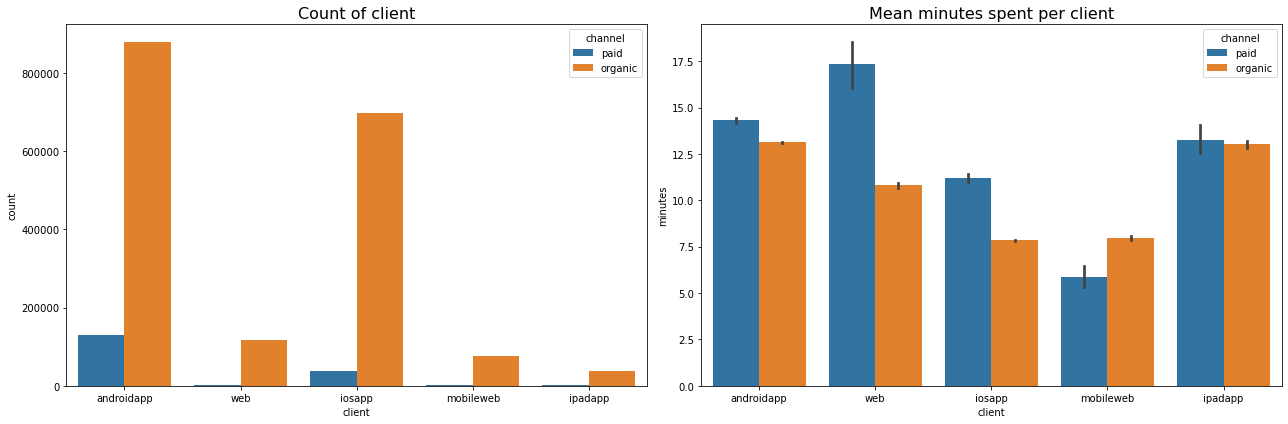

In [19]:
data = visitors_df
hue = "channel"

# Visualization: Minutes spent visiting app VS different client
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='client', hue=hue, data=data, ax=ax[0])
ax[0].set_title('Count of client', fontsize=16)

sns.barplot(x='client', y='minutes', hue=hue, data=data, ax=ax[1])
ax[1].set_title('Mean minutes spent per client', fontsize=16)
plt.tight_layout()
plt.show()

### Minutes VS ip_country 

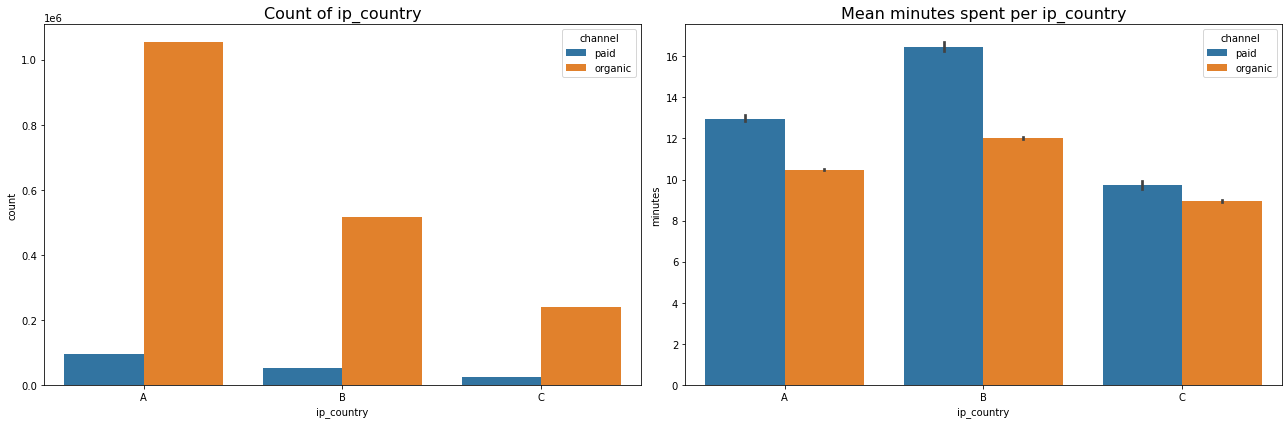

In [20]:
# Visualization: Minutes spent visiting app VS different ip_country
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='ip_country', hue=hue, data=data, ax=ax[0])
ax[0].set_title('Count of ip_country', fontsize=16)

sns.barplot(x='ip_country', y='minutes', hue=hue, data=data, ax=ax[1])
ax[1].set_title('Mean minutes spent per ip_country', fontsize=16)
plt.tight_layout()
plt.show()

### Minutes VS gender 

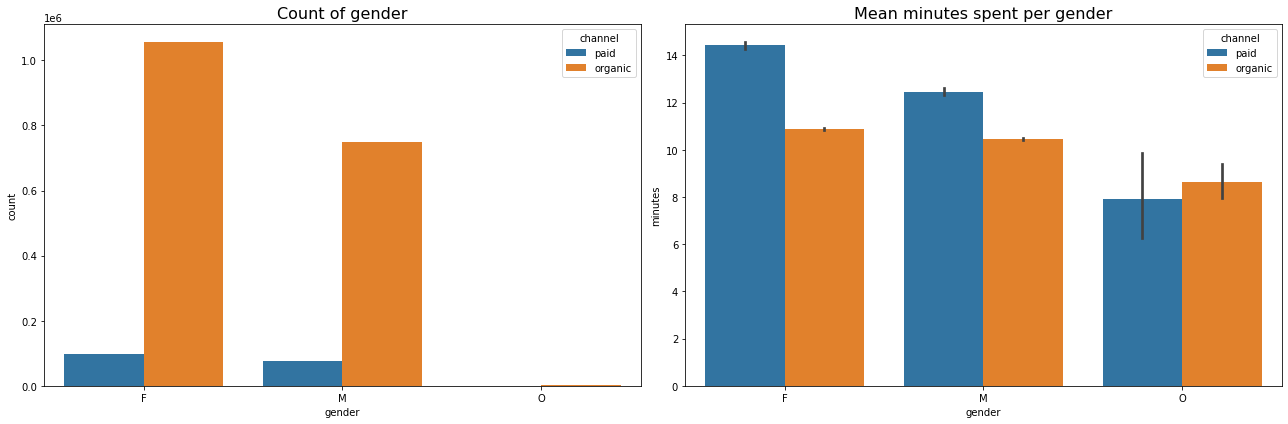

In [21]:
# Visualization: Minutes spent visiting app VS different gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='gender', hue=hue, data=data, ax=ax[0])
ax[0].set_title('Count of gender', fontsize=16)

sns.barplot(x='gender', y='minutes', hue=hue, data=data, ax=ax[1])
ax[1].set_title('Mean minutes spent per gender', fontsize=16)
plt.tight_layout()
plt.show()

### Minutes VS year-born 

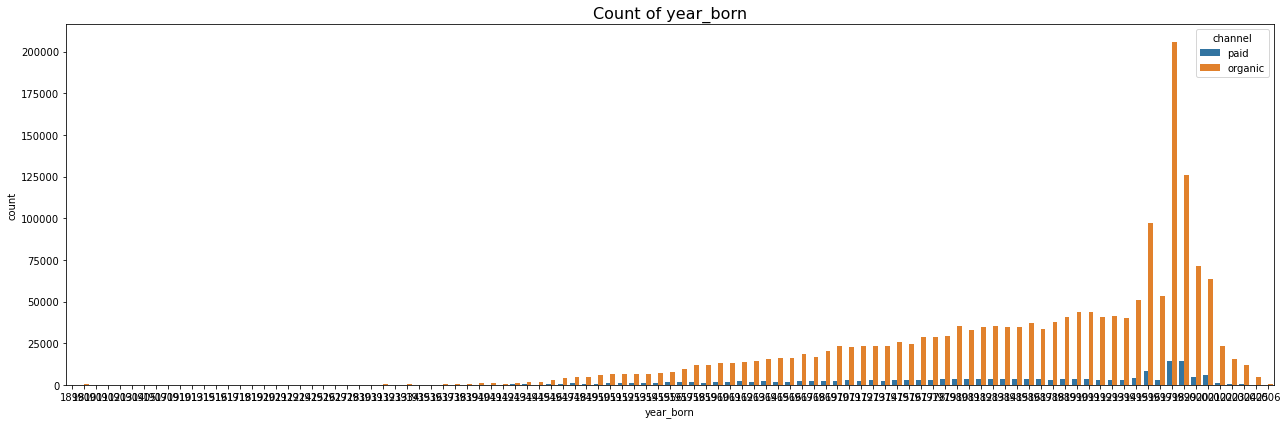

In [22]:
# Visualization: user count VS year_born
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.countplot(x='year_born', hue=hue, data=data, ax=ax)
ax.set_title('Count of year_born', fontsize=16)

plt.tight_layout()
plt.show()

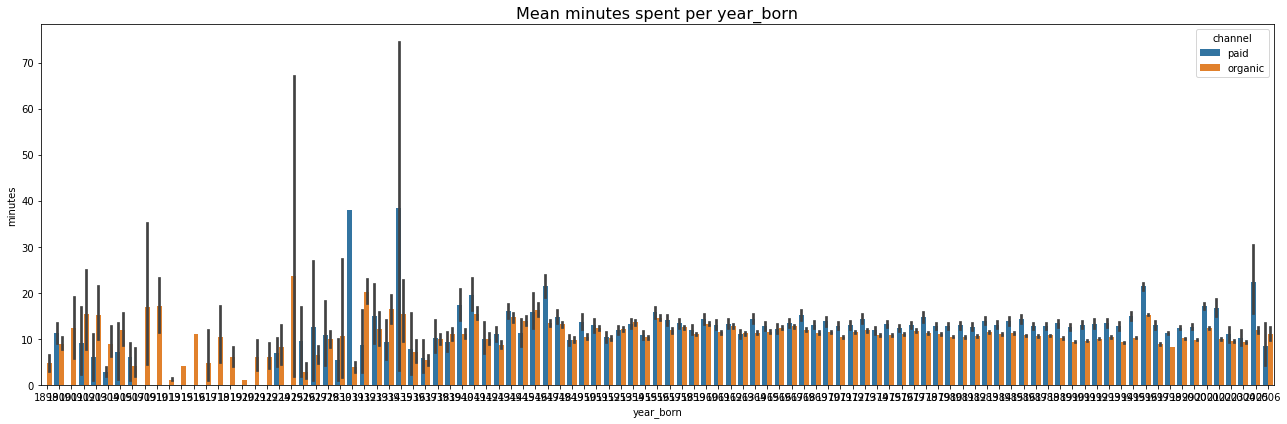

In [23]:
# Visualization: Minutes spent visiting app VS different year_born
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(x='year_born', y='minutes', hue=hue, data=data, ax=ax)
ax.set_title('Mean minutes spent per year_born', fontsize=16)
plt.tight_layout()
plt.show()

### Comments on orders analysis

We studied the effect of "client", "ip_country", "gender", "year_born", "channel" on "minutes" spent on the app. We found:

- in general, paid channel results in more time spent in our app (except for users with mobileweb)
- user spent least time on mobileweb, spent most time on web
- user in country B spent most time
- Female spent most time compare to other genders
- Elder users born before 1930s spent less time, and many don't use paid channel; young users with paid channel spent more time compared with organic channel. For users born after 1940s, the age's effect is not obvious

Actionable insights/ suggestions:
- consider improving user engagement in country C (like promotion)
- improve mobileweb client (perhaps make it more user-friendly)

In [24]:
# -------------------------------

# aggregate orders
# aggregate visitors

## Aggregate Orders

In [25]:
order_count = orders.groupby("user_id")["transaction_id"].agg('count').reset_index().rename(columns={'transaction_id':'order_count'})
items_tot = orders.groupby("user_id")["items"].agg('sum').reset_index().rename(columns={'items':'items_tot'})
total_tot = orders.groupby("user_id")["total"].agg('sum').reset_index().rename(columns={'total':'total_tot'})
returned_tot = orders.groupby("user_id")["returned_items"].agg('sum').reset_index().rename(columns={'returned_items':'returned_tot'})

In [26]:
orders_agg = pd.merge(left=order_count, right=items_tot, how='left', on='user_id')
orders_agg = pd.merge(left=orders_agg, right=total_tot, how='left', on='user_id')
orders_agg = pd.merge(left=orders_agg, right=returned_tot, how='left', on='user_id')

orders_agg.head()

,user_id,order_count,items_tot,total_tot,returned_tot
0,000254d704a2edf44dbb734e1b517561,2,13,265.98,0
1,0005a756366f0d881a9af560d96a40bd,4,7,432.98,0
2,000864081fda5b7b5707db65c98b91ca,1,3,15.46,0
3,000fc876b4476bcc36af191951afb9b5,1,1,71.13,0
4,0013c370a3053b484111987677c77083,1,1,6.19,0


In [27]:
# calc avarage 
orders_agg[['items_mean', 'total_mean', 'returned_mean']] = orders_agg[['items_tot', 'total_tot', 'returned_tot']].div(orders_agg.order_count, axis=0)

In [28]:
orders_agg

,user_id,order_count,items_tot,total_tot,returned_tot,items_mean,total_mean,returned_mean
0,000254d704a2edf44dbb734e1b517561,2,13,265.98,0,6.50,132.990,0.0
1,0005a756366f0d881a9af560d96a40bd,4,7,432.98,0,1.75,108.245,0.0
2,000864081fda5b7b5707db65c98b91ca,1,3,15.46,0,3.00,15.460,0.0
3,000fc876b4476bcc36af191951afb9b5,1,1,71.13,0,1.00,71.130,0.0
4,0013c370a3053b484111987677c77083,1,1,6.19,0,1.00,6.190,0.0
...,...,...,...,...,...,...,...,...
27067,fff1ec4dde8167d39b7b7bb69924a690,5,7,182.46,0,1.40,36.492,0.0
27068,fff2feb536b7d0bc22a8be1fe4cb7130,2,7,157.74,0,3.50,78.870,0.0
27069,fff4a17c770ec48e1666f568c3b5705f,2,2,71.13,0,1.00,35.565,0.0
27070,fff827b347b41e715d2b7bafd7fcbf42,1,1,108.25,0,1.00,108.250,0.0


## Aggregate Visitors

In [29]:
session_count = visitors.groupby("user_id")["session_id"].agg('count').reset_index().rename(columns={'session_id':'session_count'})
minutes_sum = visitors.groupby("user_id")["minutes"].agg('sum').reset_index().rename(columns={'minutes':'minutes_sum'})

In [30]:
# combine session_count and minutes_sum for 118577 unique visitors
visitors_agg = pd.merge(left=session_count, right=minutes_sum, how='left', on='user_id')
visitors_agg[['minutes_mean']] = visitors_agg[['minutes_sum']].div(visitors_agg.session_count, axis=0)
visitors_agg

,user_id,session_count,minutes_sum,minutes_mean
0,0000f79a8363986ff6a888f20dd80e21,1,1,1.000000
1,0001e14d50ac8d01abbba7abbfe160ed,2,5,2.500000
2,000254d704a2edf44dbb734e1b517561,86,1287,14.965116
3,00025ec0d0e649236580c8ab0b3e0ea1,2,11,5.500000
4,00048ba7987c16ee71cedca29ef8d3db,6,22,3.666667
...,...,...,...,...
118572,fffd92765d0f276aaae2d0a2fc061ddd,2,2,1.000000
118573,fffdc76d6da1e5af084e73cd6e04cf45,2,3,1.500000
118574,fffe02767a16c18eff2f97b0cde8c076,18,580,32.222222
118575,fffef15805e606f3bfa249836bc4b3e1,6,126,21.000000


In [31]:
print("unique users who order",len(orders_agg["user_id"].unique()))
print("unique users who visit",len(visitors_agg["user_id"].unique()))

unique users who order 27072
unique users who visit 118577


Comments:

- From the basic data, visitors data has ~1.98M rows, while orders data has ~120k rows.
- ~6% of the visiting events converts to transaction events.
- Of those 1.98M visiting events, there are ~120k unique users. On average, each user visits the app ~16 times.
- Of those ~120k transactions, there are ~27k unique users. On average, each user made ~4 transactions.

We will then join orders dataframe with visitors dataframe based on user_id.

## Analyze the aggregated order table and aggregated visit table

(0.0, 100.0)

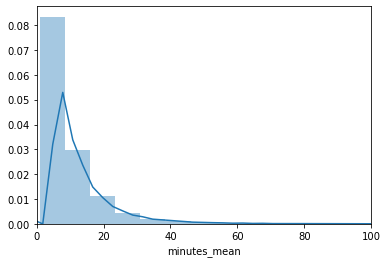

In [32]:
# distribution of average time spent
sns.distplot(visitors_agg["minutes_mean"]) # , bins= 100
plt.xlim([0,100.0])

(0.0, 20.0)

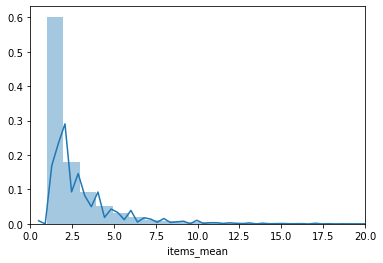

In [33]:
# distribution of average order total
sns.distplot(orders_agg["items_mean"])
plt.xlim([0,20.0])

In [34]:
orders_agg["items_mean"].describe()

count    27072.000000
mean         2.252871
std          2.151225
min          1.000000
25%          1.000000
50%          1.500000
75%          2.625000
max         50.000000
Name: items_mean, dtype: float64

(0.0, 1000.0)

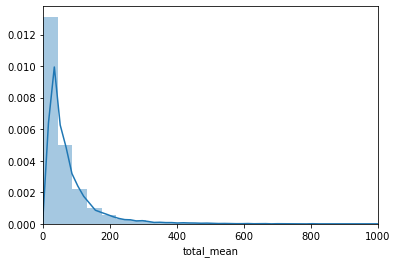

In [35]:
sns.distplot(orders_agg["total_mean"])
plt.xlim([0,1000.0])

In [36]:
orders_agg["total_mean"].describe()

count    27072.000000
mean        61.450086
std         86.363113
min          0.000000
25%         14.433333
50%         35.050000
75%         75.256667
max       2188.660000
Name: total_mean, dtype: float64

In [37]:
#sns.distplot(orders_agg["returned_mean"])
#orders_agg["returned_mean"].describe()

## Analyze the users who ordered

In [38]:
data_inner = pd.merge(visitors_agg,orders_agg,on='user_id')
#data_left = pd.merge(left=visitors_agg, right=orders_agg, how='left', on='user_id')
data_inner

,user_id,session_count,minutes_sum,minutes_mean,order_count,items_tot,total_tot,returned_tot,items_mean,total_mean,returned_mean
0,000254d704a2edf44dbb734e1b517561,86,1287,14.965116,2,13,265.98,0,6.50,132.990,0.0
1,0005a756366f0d881a9af560d96a40bd,23,340,14.782609,4,7,432.98,0,1.75,108.245,0.0
2,000864081fda5b7b5707db65c98b91ca,47,267,5.680851,1,3,15.46,0,3.00,15.460,0.0
3,000fc876b4476bcc36af191951afb9b5,32,221,6.906250,1,1,71.13,0,1.00,71.130,0.0
4,0013c370a3053b484111987677c77083,9,190,21.111111,1,1,6.19,0,1.00,6.190,0.0
...,...,...,...,...,...,...,...,...,...,...,...
27067,fff1ec4dde8167d39b7b7bb69924a690,13,280,21.538462,5,7,182.46,0,1.40,36.492,0.0
27068,fff2feb536b7d0bc22a8be1fe4cb7130,24,294,12.250000,2,7,157.74,0,3.50,78.870,0.0
27069,fff4a17c770ec48e1666f568c3b5705f,25,208,8.320000,2,2,71.13,0,1.00,35.565,0.0
27070,fff827b347b41e715d2b7bafd7fcbf42,14,69,4.928571,1,1,108.25,0,1.00,108.250,0.0


## If more time spent in app results in more purchase?
Analyze mean, and total

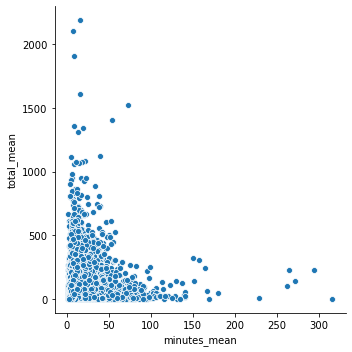

In [39]:
sns.relplot(x="minutes_mean", y="total_mean", data=data_inner)

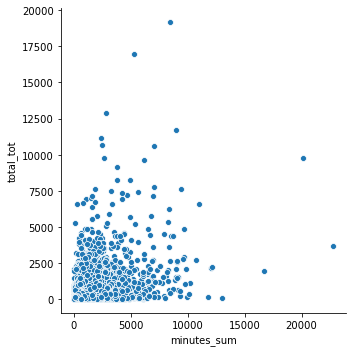

In [40]:
sns.relplot(x="minutes_sum", y="total_tot", data=data_inner)

Comments:
- no obvious relationship between time spent and purchase amount

In [41]:
visitors_select = visitors[["user_id", "gender"]].drop_duplicates()

data_inner = pd.merge(data_inner,visitors_select,on='user_id')
data_inner

# 27072 rows < 27454 rows when adding gender column, user input wrong data

,user_id,session_count,minutes_sum,minutes_mean,order_count,items_tot,total_tot,returned_tot,items_mean,total_mean,returned_mean,gender
0,000254d704a2edf44dbb734e1b517561,86,1287,14.965116,2,13,265.98,0,6.50,132.990,0.0,F
1,0005a756366f0d881a9af560d96a40bd,23,340,14.782609,4,7,432.98,0,1.75,108.245,0.0,F
2,000864081fda5b7b5707db65c98b91ca,47,267,5.680851,1,3,15.46,0,3.00,15.460,0.0,M
3,000fc876b4476bcc36af191951afb9b5,32,221,6.906250,1,1,71.13,0,1.00,71.130,0.0,F
4,0013c370a3053b484111987677c77083,9,190,21.111111,1,1,6.19,0,1.00,6.190,0.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...
27449,fff1ec4dde8167d39b7b7bb69924a690,13,280,21.538462,5,7,182.46,0,1.40,36.492,0.0,F
27450,fff2feb536b7d0bc22a8be1fe4cb7130,24,294,12.250000,2,7,157.74,0,3.50,78.870,0.0,F
27451,fff4a17c770ec48e1666f568c3b5705f,25,208,8.320000,2,2,71.13,0,1.00,35.565,0.0,F
27452,fff827b347b41e715d2b7bafd7fcbf42,14,69,4.928571,1,1,108.25,0,1.00,108.250,0.0,F


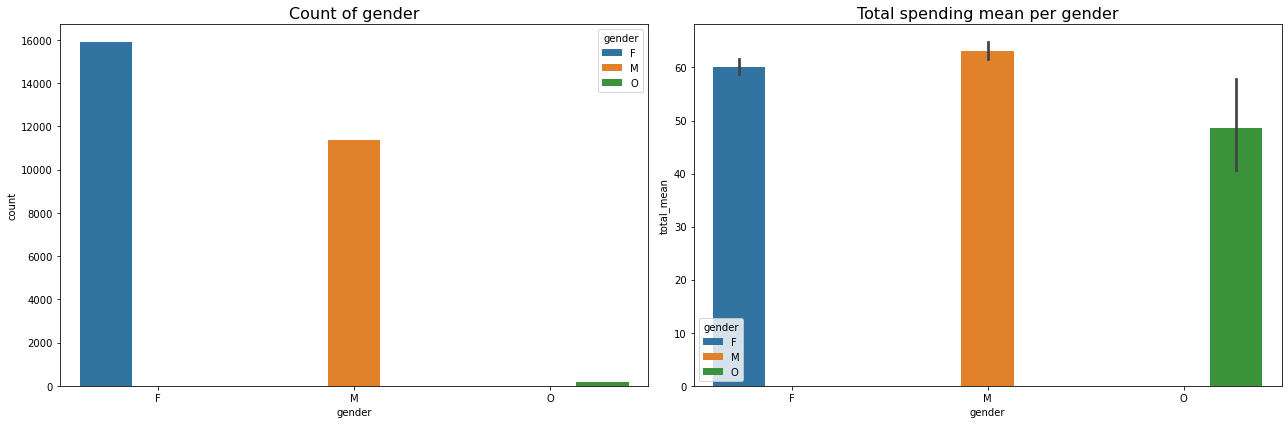

In [42]:
# Visualization: Total spending mean VS different gender

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='gender', hue="gender", data=data_inner, ax=ax[0])
ax[0].set_title('Count of gender', fontsize=16)

sns.barplot(x='gender', y='total_mean', hue="gender", data=data_inner, ax=ax[1])
ax[1].set_title('Total spending mean per gender', fontsize=16)
plt.tight_layout()
plt.show()

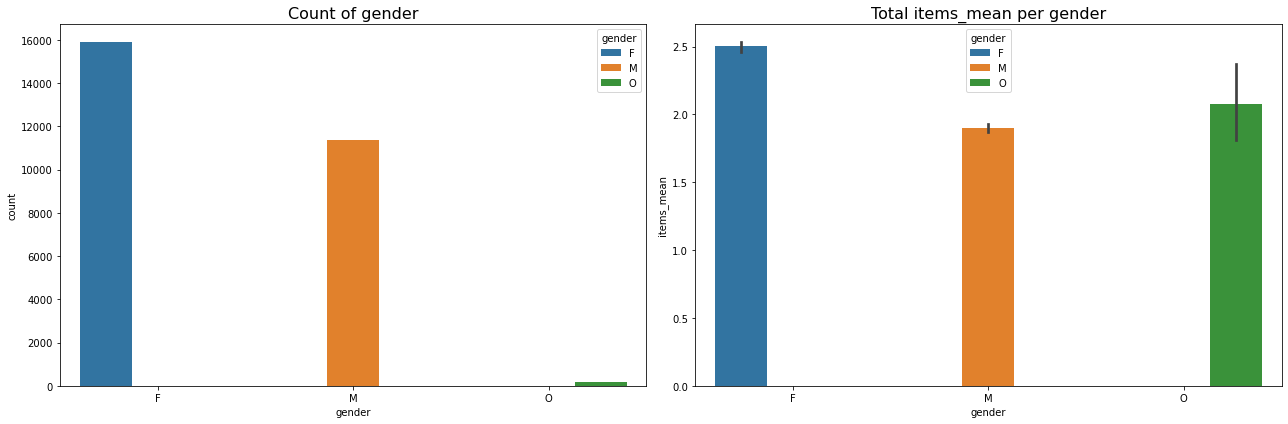

In [43]:
# Visualization: Total returned_mean VS different gender

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='gender', hue="gender", data=data_inner, ax=ax[0])
ax[0].set_title('Count of gender', fontsize=16)

sns.barplot(x='gender', y='items_mean', hue="gender", data=data_inner, ax=ax[1])
ax[1].set_title('Total items_mean per gender', fontsize=16)
plt.tight_layout()
plt.show()


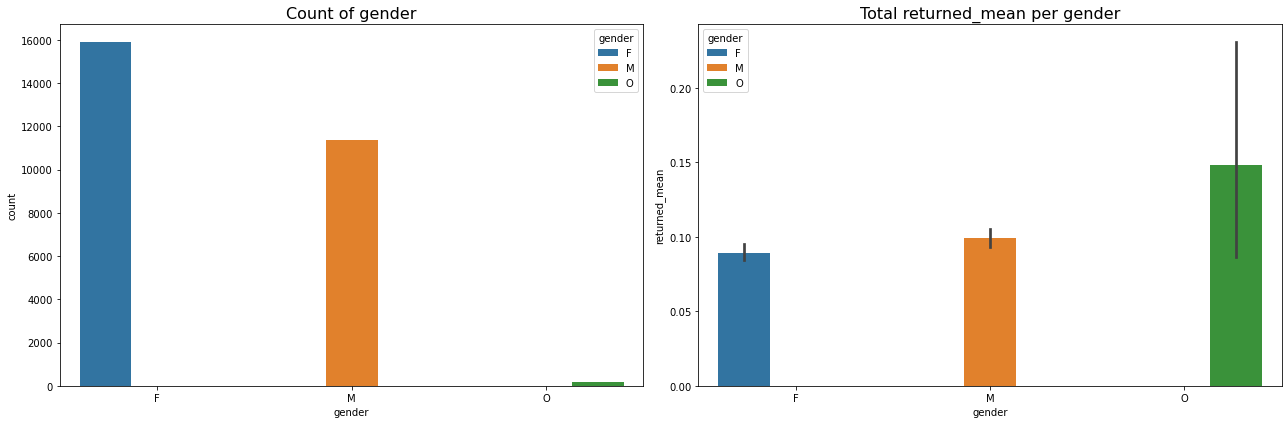

In [44]:
# Visualization: Total returned mean VS different gender\

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='gender', hue="gender", data=data_inner, ax=ax[0])
ax[0].set_title('Count of gender', fontsize=16)

sns.barplot(x='gender', y='returned_mean', hue="gender", data=data_inner, ax=ax[1])
ax[1].set_title('Total returned_mean per gender', fontsize=16)
plt.tight_layout()
plt.show()

In [45]:
visitors_select = visitors[["user_id", "year_born"]].drop_duplicates()

data_inner = pd.merge(data_inner,visitors_select,on='user_id')

data_inner

,user_id,session_count,minutes_sum,minutes_mean,order_count,items_tot,total_tot,returned_tot,items_mean,total_mean,returned_mean,gender,year_born
0,000254d704a2edf44dbb734e1b517561,86,1287,14.965116,2,13,265.98,0,6.50,132.990,0.0,F,2000
1,0005a756366f0d881a9af560d96a40bd,23,340,14.782609,4,7,432.98,0,1.75,108.245,0.0,F,1995
2,000864081fda5b7b5707db65c98b91ca,47,267,5.680851,1,3,15.46,0,3.00,15.460,0.0,M,1993
3,000fc876b4476bcc36af191951afb9b5,32,221,6.906250,1,1,71.13,0,1.00,71.130,0.0,F,1998
4,0013c370a3053b484111987677c77083,9,190,21.111111,1,1,6.19,0,1.00,6.190,0.0,M,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27965,fff1ec4dde8167d39b7b7bb69924a690,13,280,21.538462,5,7,182.46,0,1.40,36.492,0.0,F,1999
27966,fff2feb536b7d0bc22a8be1fe4cb7130,24,294,12.250000,2,7,157.74,0,3.50,78.870,0.0,F,2002
27967,fff4a17c770ec48e1666f568c3b5705f,25,208,8.320000,2,2,71.13,0,1.00,35.565,0.0,F,2001
27968,fff827b347b41e715d2b7bafd7fcbf42,14,69,4.928571,1,1,108.25,0,1.00,108.250,0.0,F,1975


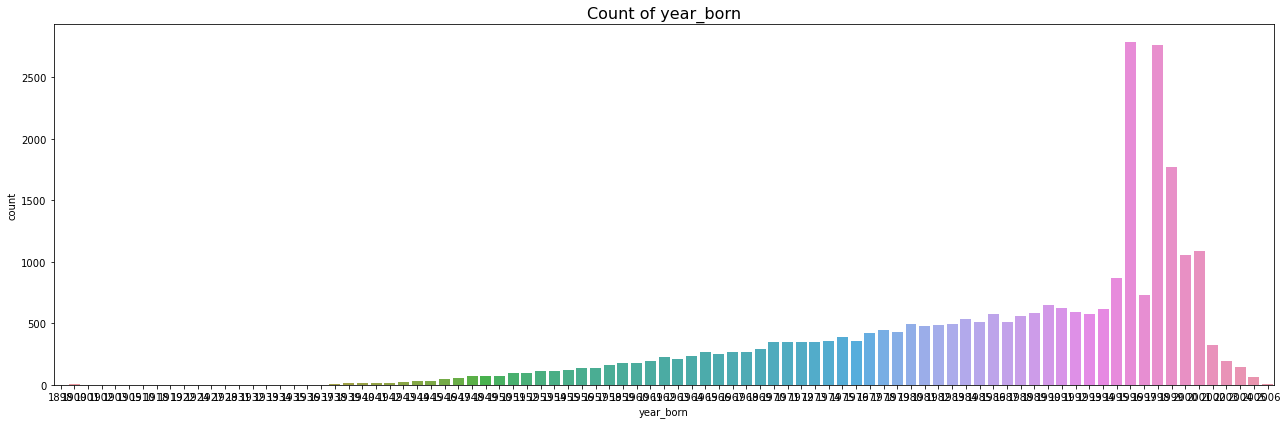

In [46]:

# Visualization: count VS different year born
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.countplot(x='year_born', data=data_inner, ax=ax)
ax.set_title('Count of year_born', fontsize=16)

plt.tight_layout()
plt.show()

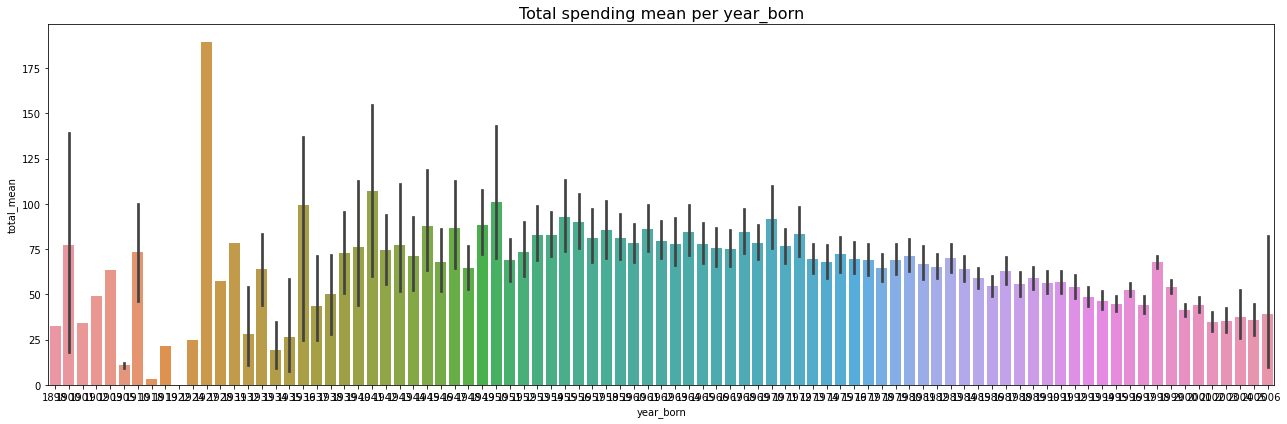

In [47]:
# Visualization: Mean spending mean VS different year born
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(x='year_born', y='total_mean', data=data_inner, ax=ax)
ax.set_title('Total spending mean per year_born', fontsize=16)
plt.tight_layout()
plt.show()

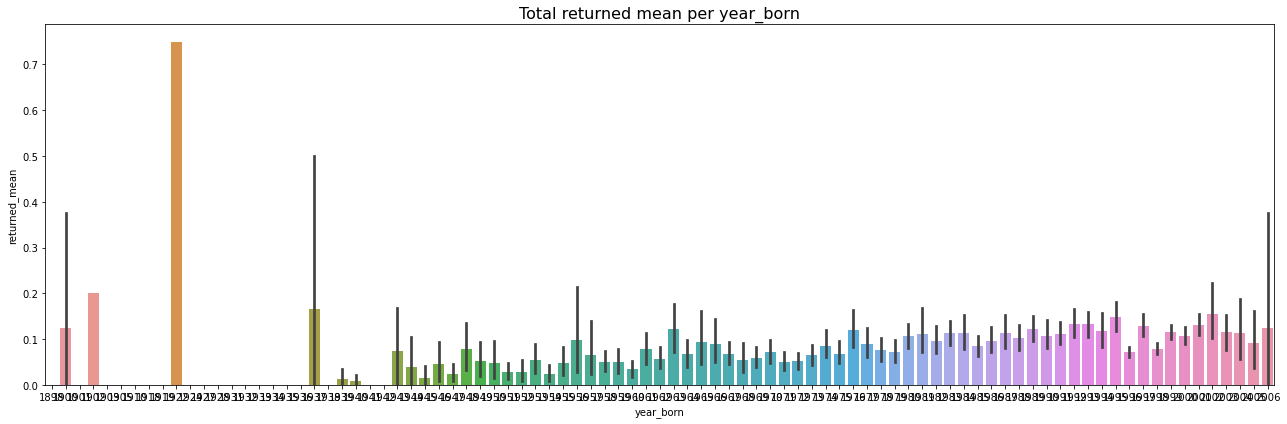

In [48]:
# Visualization: Total returned mean VS different year born
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(x='year_born', y='returned_mean', data=data_inner, ax=ax)
ax.set_title('Total returned mean per year_born', fontsize=16)
plt.tight_layout()
plt.show()

Comments
1. gender study
- gender does not have a big effect on average spending
- F bought more items than M on averages
2. age study
- young buyers on average have more returns; elder people almost never return
- born in 1960s spend most on average


Future works could be done:

- Based on dataframe data_inner, we can build a ML model to see the relation between Xs (gender/ session_count /minutes_sum /minutes_mean) and Ys (order_count /items_tot /total_tot/returned_tot /items_mean /total_mean/returned_mean)
- We can left join visitors_agg by orders_agg, and analyze how many times users spent on the app but don't end up buying anything, and how does that compared with users who end up buying something (  #data_left = pd.merge(left=visitors_agg, right=orders_agg, how='left', on='user_id') )
